# The _EUV Snapshot Imaging Spectrograph_

_Roy T. Smart, Charles C. Kankelborg, and Jacob D. Parker_

In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import pandas
import IPython.display
from kgpy import vector, optics, format as fmt
import esis

In [3]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_colwidth', -1)

In [4]:
esis_optics_small = esis.optics.design.final(
    pupil_samples=1, 
    field_samples=5,
    all_channels=False,
)
%time rays_small = esis_optics_small.rays_output

Wall time: 456 ms


In [5]:
esis_optics = esis.optics.design.final(
    pupil_samples=101, 
    field_samples=21,
    all_channels=False
)
%time rays = esis_optics.rays_output

Wall time: 5min 37s


## Optical Layout

<IPython.core.display.Javascript object>


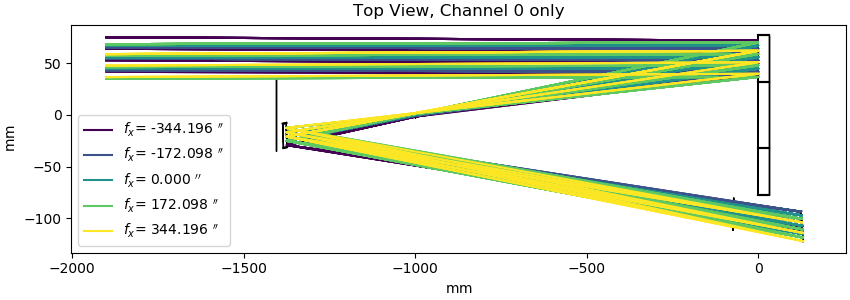

<IPython.core.display.Javascript object>


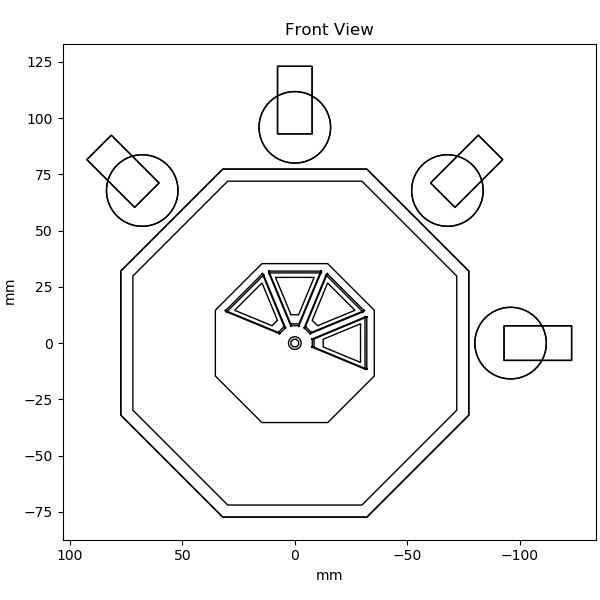

In [6]:
color_axis = optics.Rays.axis.field_x
fig_layout, ax_layout = plt.subplots(figsize=(8.5, 3), constrained_layout=True)
esis.optics.design.final(field_samples=5, pupil_samples=5, all_channels=False).system.plot(
    ax=ax_layout, 
    components=(vector.iz, vector.ix),
    color_axis=color_axis,
)
_ = ax_layout.set_title('Top View, Channel 0 only')

fig_bore, ax_bore = plt.subplots(figsize=(6, 6), constrained_layout=True)
ax_bore.invert_xaxis()
esis.optics.design.final().system.plot(
    ax=ax_bore, 
    plot_rays=False,
)
_ = ax_bore.set_title('Front View')
ax_bore.set_aspect('equal')

## Point-spread Function

In [7]:
%%time
rays_psf = esis.optics.design.final(
    pupil_samples=101, 
    field_samples=5,
    all_channels=False
).rays_output

Wall time: 22.4 s


<IPython.core.display.Javascript object>


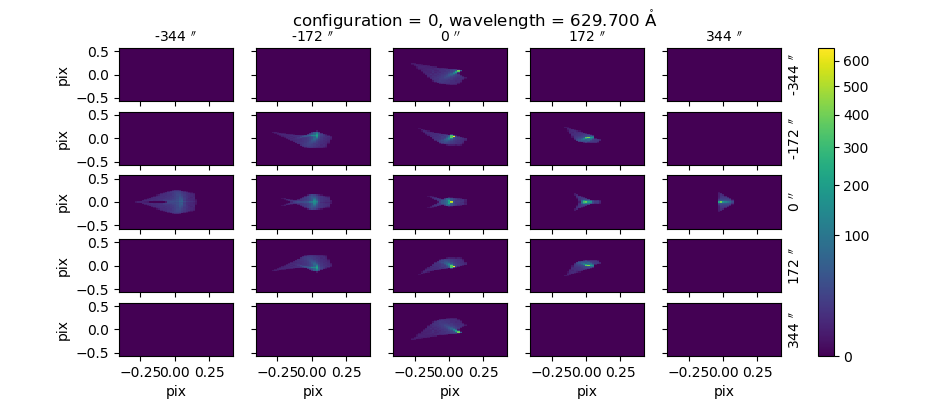

<IPython.core.display.Javascript object>


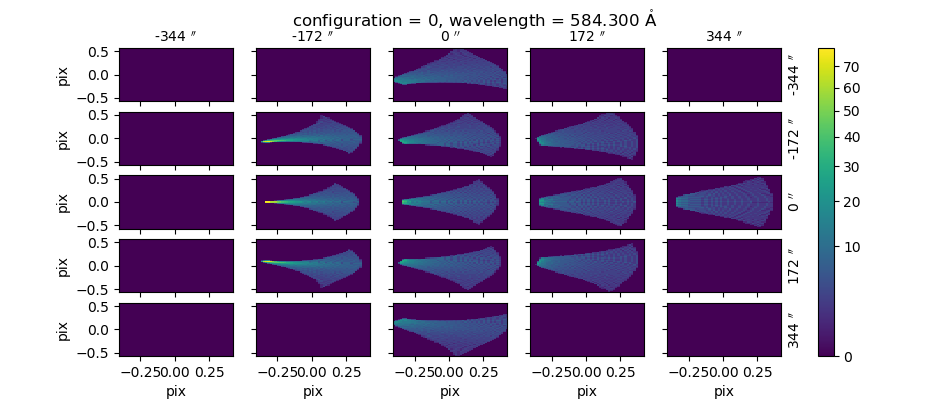

In [8]:
bins = rays_psf.input_pupil_x.shape[~0] // 2

fig_630 = rays_psf.plot_pupil_hist2d_vs_field(wavlen_index=~0, norm=matplotlib.colors.PowerNorm(1/2), bins=bins, )
fig_630.set_figheight(4)
fig_630.set_figwidth(9.5)

fig_584 = rays_psf.plot_pupil_hist2d_vs_field(wavlen_index=0, norm=matplotlib.colors.PowerNorm(1/2), bins=bins, )
fig_584.set_figheight(4)
fig_584.set_figwidth(9.5)

<IPython.core.display.Javascript object>


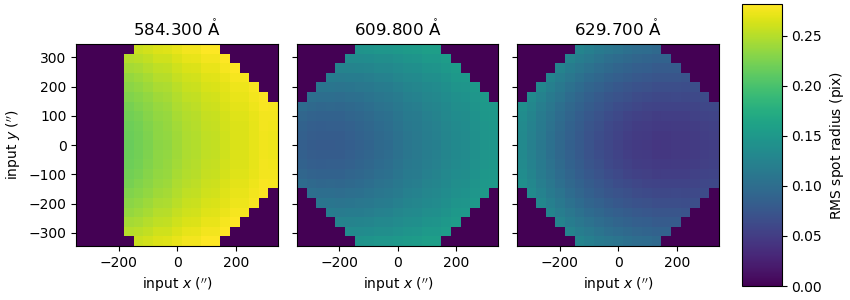

In [9]:
fig_sz, axs_sz = plt.subplots(ncols=3, figsize=(8.5, 3), sharex=True, sharey=True, constrained_layout=True)
_ = rays.plot_spot_size_vs_field(axs=axs_sz)

## Vignetting

In [10]:
vignetting_linear = rays.vignetting(polynomial_degree=1)
vignetting_linear.model().dataframe

,$C_{ }$,$C_{\lambda }$,$C_{ x }$,$C_{ y }$
$V$,80.039 $\mathrm{\%}$,1.264e-03 $\mathrm{\frac{\%}{\mathring{A}}}$,-5.341e-02 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$,-1.343e-17 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$


In [11]:
vignetting_quadratic = rays.vignetting(polynomial_degree=2)
vignetting_quadratic.model().dataframe

,$C_{ }$,$C_{\lambda }$,$C_{ x }$,$C_{ y }$,$C_{\lambda\lambda }$,$C_{\lambda x }$,$C_{ xx }$,$C_{\lambda y }$,$C_{ x y }$,$C_{ yy }$
$V$,63.911 $\mathrm{\%}$,5.443e-02 $\mathrm{\frac{\%}{\mathring{A}}}$,-4.771e-02 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$,-1.918e-15 $\mathrm{\frac{\%}{{}^{\prime\prime}}}$,-4.391e-05 $\mathrm{\frac{\%}{\mathring{A}^{2}}}$,"-9.400e-06 $\mathrm{\frac{\%}{\mathring{A}\,{}^{\prime\prime}}}$",1.969e-06 $\mathrm{\frac{\%}{arcsec^{2}}}$,"-5.620e-18 $\mathrm{\frac{\%}{\mathring{A}\,{}^{\prime\prime}}}$",2.358e-19 $\mathrm{\frac{\%}{arcsec^{2}}}$,-4.066e-07 $\mathrm{\frac{\%}{arcsec^{2}}}$


<IPython.core.display.Javascript object>


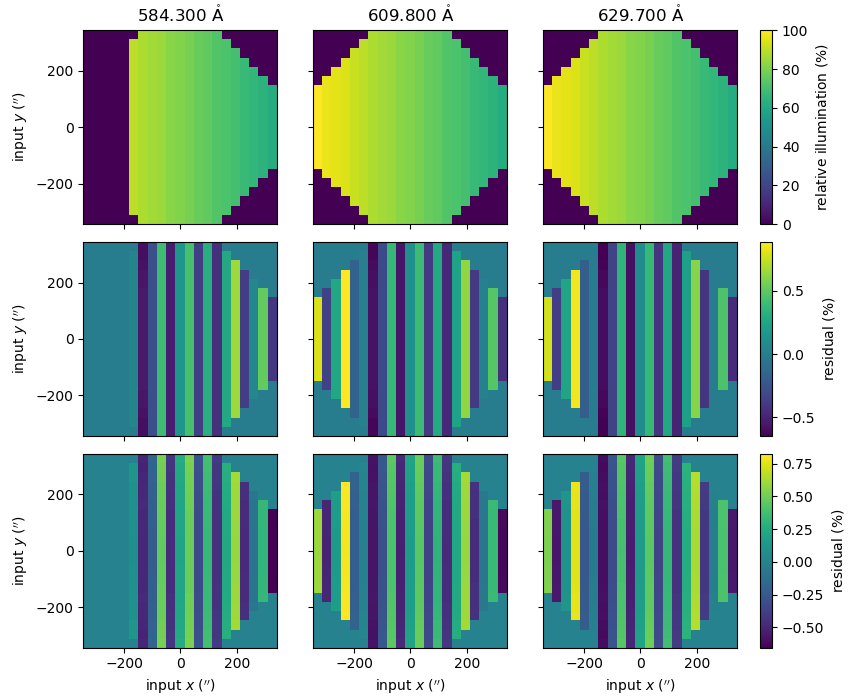

In [12]:
fig_vig, axs_vig = plt.subplots(nrows=3, ncols=3, figsize=(8.5, 7), sharex=True, sharey=True, constrained_layout=True)
_ = vignetting_linear.plot_unvignetted(axs=axs_vig[0], use_xlabels=False)
_ = vignetting_linear.plot_residual(axs=axs_vig[1], use_titles=False, use_xlabels=False)
_ = vignetting_quadratic.plot_residual(axs=axs_vig[2], use_titles=False)

## Distortion

In [13]:
distortion_linear = rays_small.distortion(polynomial_degree=1)
distortion_quadratic = rays_small.distortion(polynomial_degree=2)
distortion_large = rays.distortion()

In [14]:
distortion_quadratic.model().dataframe

,$C_{ }$,$C_{\lambda }$,$C_{ x }$,$C_{ y }$,$C_{\lambda\lambda }$,$C_{\lambda x }$,$C_{ xx }$,$C_{\lambda y }$,$C_{ x y }$,$C_{ yy }$
$x'$,-14692.062 $\mathrm{pix}$,24.177 $\mathrm{\frac{pix}{\mathring{A}}}$,1.208 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,-0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,2.453e-03 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$,"2.453e-04 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",7.065e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$,"4.006e-14 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",-8.939e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$,2.064e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$
$y'$,512.000 $\mathrm{pix}$,-0.000 $\mathrm{\frac{pix}{\mathring{A}}}$,-0.000 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,-1.239 $\mathrm{\frac{pix}{{}^{\prime\prime}}}$,3.254e-15 $\mathrm{\frac{pix}{\mathring{A}^{2}}}$,"-8.906e-17 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",3.927e-16 $\mathrm{\frac{pix}{arcsec^{2}}}$,"-9.375e-05 $\mathrm{\frac{pix}{\mathring{A}\,{}^{\prime\prime}}}$",-4.692e-06 $\mathrm{\frac{pix}{arcsec^{2}}}$,1.930e-15 $\mathrm{\frac{pix}{arcsec^{2}}}$


In [15]:
distortion_quadratic.model(inverse=True).dataframe

,$C_{ }$,$C_{\lambda }$,$C_{ x' }$,$C_{ y' }$,$C_{\lambda\lambda }$,$C_{\lambda x' }$,$C_{ x'x' }$,$C_{\lambda y' }$,$C_{ x' y' }$,$C_{ y'y' }$
$x$,11402.703 $\mathrm{{}^{\prime\prime}}$,-19.704 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$,0.730 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,0.001 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,-2.678e-04 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$,"1.976e-05 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",-2.813e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,"5.276e-14 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",1.217e-15 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,-9.032e-07 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$
$y$,395.955 $\mathrm{{}^{\prime\prime}}$,0.000 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}}}$,-0.001 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,-0.773 $\mathrm{\frac{{}^{\prime\prime}}{pix}}$,1.474e-14 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}^{2}}}$,"-1.247e-15 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",7.768e-17 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,"-7.083e-08 $\mathrm{\frac{{}^{\prime\prime}}{\mathring{A}\,pix}}$",2.058e-06 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$,7.211e-16 $\mathrm{\frac{{}^{\prime\prime}}{pix^{2}}}$


<IPython.core.display.Javascript object>


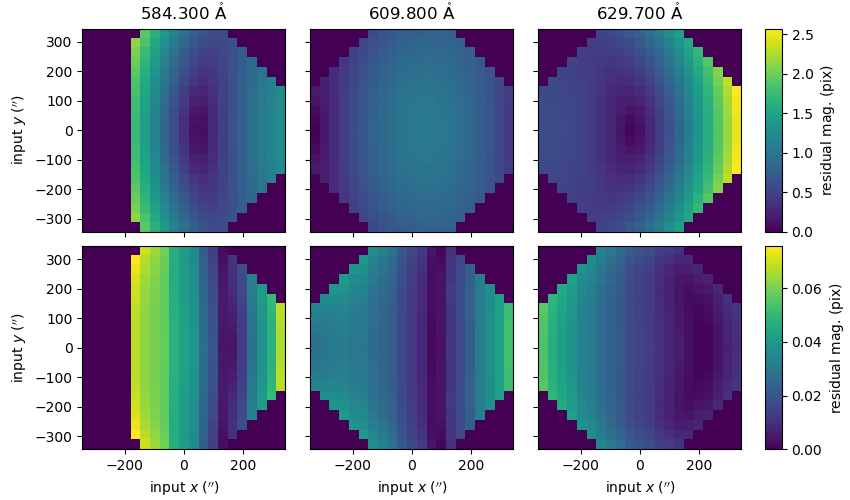

In [16]:
fig_dist_res, axs_dist_res = plt.subplots(nrows=2, ncols=3, figsize=(8.5, 5), sharex=True, sharey=True, constrained_layout=True)
_ = distortion_linear.plot_residual(axs=axs_dist_res[0], other=distortion_large, use_xlabels=False)
_ = distortion_quadratic.plot_residual(axs=axs_dist_res[1], other=distortion_large, use_titles=False)

## Level 0 Dataset

In [17]:
level_0 = esis.flight.level_0()

<IPython.core.display.Javascript object>


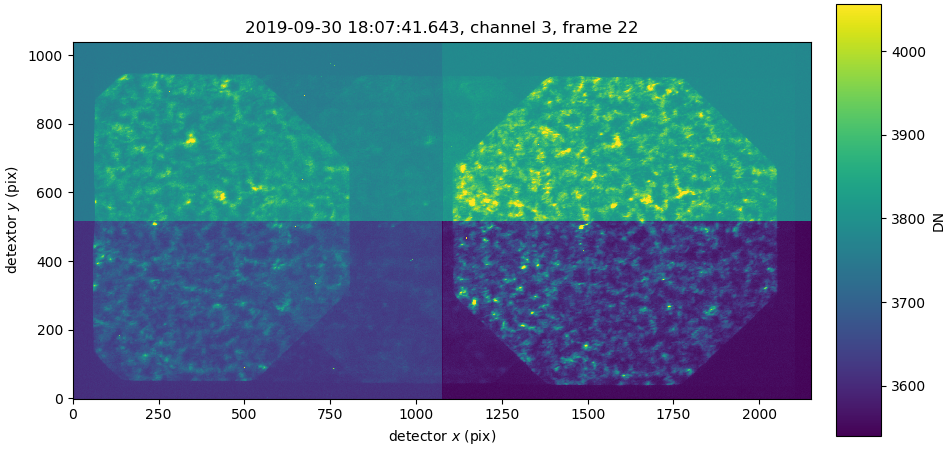

In [50]:
fig_lev0_anim, ax_lev0_anim = plt.subplots(figsize=(9.5, 4.5), constrained_layout=True)
level_0.animate_channel(ax=ax_lev0_anim, exposure_slice=slice(8, 42), channel_index=2)

<IPython.core.display.Javascript object>


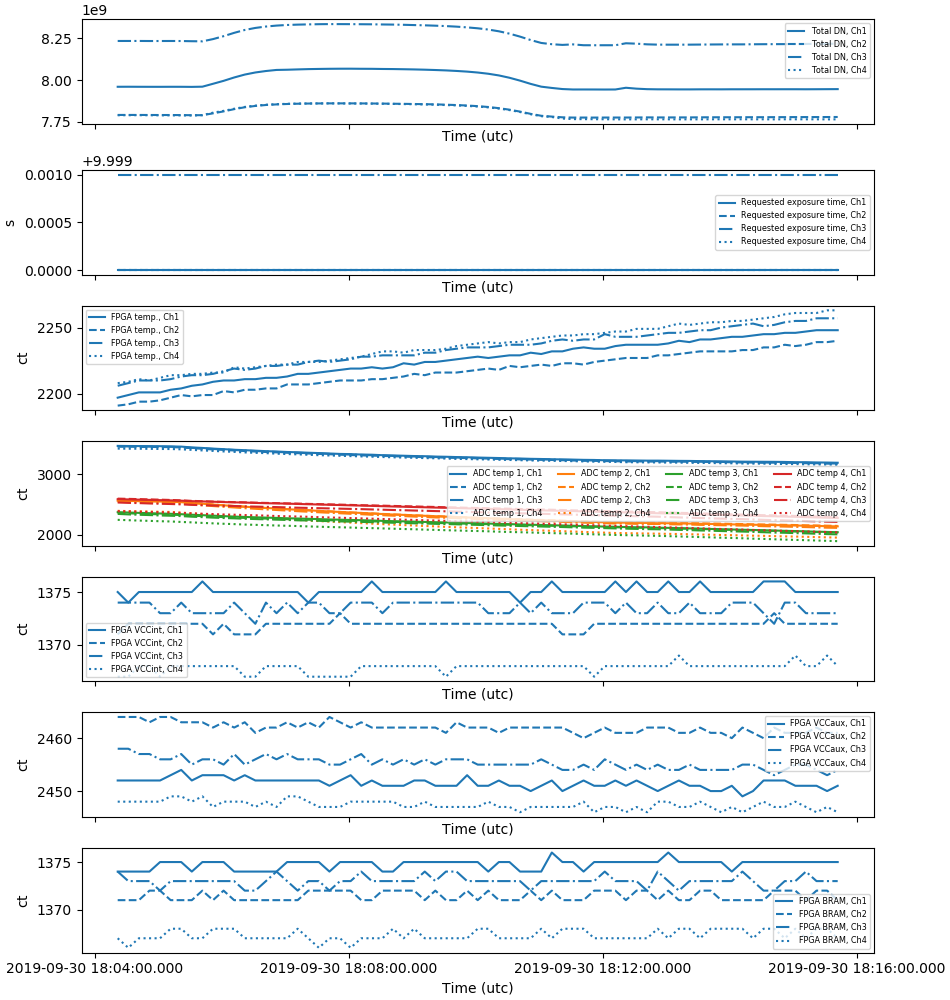

In [25]:
fig_lev0_vs_t, ax_lev0_vs_t = plt.subplots(nrows=7, figsize=(9.5, 10), sharex=True, constrained_layout=True)
_ = level_0.plot_all_vs_time(ax_lev0_vs_t)